## Feature Engineering/Train Test Split

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

In [2]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,429000.0,-1.482459,-1.451039,-1.089549,-0.277679,-0.915531,-0.082498,-0.304942,-0.629972,-0.560787,-0.856042,-0.649622,1922,1922.0,0.355179,-0.302785
1,689000.0,-1.482459,-0.475727,0.271949,-0.119683,-0.915531,-0.082498,2.310557,0.907199,-0.560787,-0.686910,1.874139,1953,1953.0,0.836769,-0.110297
2,527000.0,0.676671,0.499586,0.816548,-0.215789,0.937409,-0.082498,-0.304942,-0.629972,1.143952,1.258098,-0.649622,2000,2000.0,1.084861,-0.240382
3,1140000.0,0.676671,-0.475727,1.088848,-0.207652,-0.915531,-0.082498,-0.304942,0.907199,1.143952,-0.107032,2.488027,1941,1941.0,1.420514,-0.258384
4,450000.0,3.915367,2.450211,1.165092,-0.176260,0.937409,-0.082498,-0.304942,-0.629972,0.291583,1.644684,-0.649622,2013,2013.0,-0.155598,-0.247788


In [3]:
outcome = 'price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [4]:
train, test = train_test_split(df)

In [5]:
print(len(train), len(test))
train.head()

16197 5400


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
2911,834800.0,-0.402894,1.800003,1.513636,-0.263891,2.790349,-0.082498,-0.304942,-0.629972,1.143952,2.031270,-0.649622,2008,2008.0,2.106415,-0.311291
18822,465000.0,-0.402894,-1.451039,-1.274713,-0.270918,-0.915531,-0.082498,-0.304942,-0.629972,-0.560787,-1.218466,-0.354046,1942,1942.0,-1.118777,-0.325517
5657,975000.0,1.756237,3.100419,2.417671,-0.068805,0.937409,-0.082498,-0.304942,-0.629972,1.996322,3.033976,-0.649622,2004,2004.0,2.865284,-0.018636
20076,570000.0,0.676671,0.499586,0.217489,-0.255125,0.937409,-0.082498,-0.304942,-0.629972,0.291583,0.593654,-0.649622,2003,2003.0,0.378529,-0.301538
7506,559000.0,-1.482459,-1.451039,-0.915277,-0.210067,-0.915531,-0.082498,1.002808,0.907199,-0.560787,-0.880203,-0.240363,1938,1938.0,-1.089590,-0.233122


In [6]:
test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
2543,252000.0,-0.402894,0.174482,-0.370678,-0.102949,-0.915531,-0.082498,-0.304942,-0.629972,-0.560787,-1.061415,1.237515,1981,1981.0,0.150868,-0.192792
3436,527000.0,-0.402894,0.174482,0.173921,-0.208859,-0.915531,-0.082498,-0.304942,-0.629972,-0.560787,-0.421133,1.169305,1979,1979.0,-0.870686,-0.231289
6508,725000.0,-0.402894,0.499586,1.633447,0.950207,0.010939,-0.082498,-0.304942,-0.629972,1.143952,2.164158,-0.649622,1990,1990.0,1.610231,0.850053
766,212000.0,-0.402894,-0.475727,-1.067765,-0.129173,-0.915531,-0.082498,-0.304942,0.907199,-1.413157,-0.831880,-0.649622,1967,1967.0,-1.293901,-0.104797
921,455000.0,0.676671,0.499586,0.391761,-0.243848,0.937409,-0.082498,-0.304942,-0.629972,0.291583,0.786947,-0.649622,2005,2005.0,0.398960,-0.284416


In [7]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     1997.
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:52:24   Log-Likelihood:            -2.2170e+05
No. Observations:               16197   AIC:                         4.434e+05
Df Residuals:                   16181   BIC:                         4.435e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.432e+06   1.61e+05     46.296      0.000    7.12e+06    7.75e+06
bedrooms      -3.358e+04   2131.762    -15.750      0.000   -3.78e+04   -2.94e+04
bathrooms      3.332e+04   3035.422     10.978      0.000    2.74e+04    3.93e+04
sqft_living    1.136e+05   2.07e+04      5.501      0.000    7.31e+04    1.54e+05
sqft_lot        911.1201   2383.703      0.382      0.702   -3761.201    5583.441
floors         1.619e+04   2326.059      6.961      0.000    1.16e+04    2.08e+04
waterfront     4.523e+04   1828.805     24.730      0.000    4.16e+04    4.88e+04
view           3.444e+04   1974.064     17.444      0.000    3.06e+04    3.83e+04
condition      1.379e+04   1846.161      7.469      0.000    1.02e+04    1.74e+04
grade          1.404e+05   3029.883     46.348      0.000    1.34e+05    1.46e+05
sqft_above     2.596e+04   1.86e+04      1.395      0.163   -1.05e+04    6.24e+04
sqft_basement  1.631e+04   9804.527      1.664      0.096   -2904.226    3.55e+04
yr_built      -4141.8710    153.933    -26.907      0.000   -4443.597   -3840.145
yr_renovated    643.1215    159.978      4.020      0.000     329.546     956.697
sqft_living15  1.596e+04   2818.249      5.663      0.000    1.04e+04    2.15e+04
sqft_lot15    -1.486e+04   2403.403     -6.182      0.000   -1.96e+04   -1.01e+04
==============================================================================
Omnibus:                    13268.297   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1298602.913
Skew:                           3.354   Prob(JB):                         0.00
Kurtosis:                      46.350   Cond. No.                     2.68e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Removing Uninfluential Features

In [8]:
# Extracting the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head(20)

16 12
['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,7.432e+06,1.61e+05,46.296,0.000,7.12e+06,7.75e+06
bedrooms,-3.358e+04,2131.762,-15.750,0.000,-3.78e+04,-2.94e+04
bathrooms,3.332e+04,3035.422,10.978,0.000,2.74e+04,3.93e+04
sqft_living,1.136e+05,2.07e+04,5.501,0.000,7.31e+04,1.54e+05
sqft_lot,911.1201,2383.703,0.382,0.702,-3761.201,5583.441
floors,1.619e+04,2326.059,6.961,0.000,1.16e+04,2.08e+04
waterfront,4.523e+04,1828.805,24.730,0.000,4.16e+04,4.88e+04
view,3.444e+04,1974.064,17.444,0.000,3.06e+04,3.83e+04
condition,1.379e+04,1846.161,7.469,0.000,1.02e+04,1.74e+04


In [9]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     2496.
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:52:40   Log-Likelihood:            -2.2170e+05
No. Observations:               16197   AIC:                         4.434e+05
Df Residuals:                   16184   BIC:                         4.435e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.446e+06    1.6e+05     46.582      0.000    7.13e+06    7.76e+06
bedrooms       -3.36e+04   2131.413    -15.765      0.000   -3.78e+04   -2.94e+04
bathrooms      3.371e+04   2998.697     11.242      0.000    2.78e+04    3.96e+04
sqft_living     1.44e+05   3722.468     38.691      0.000    1.37e+05    1.51e+05
floors         1.525e+04   2118.754      7.199      0.000    1.11e+04    1.94e+04
waterfront     4.518e+04   1827.649     24.719      0.000    4.16e+04    4.88e+04
view            3.48e+04   1940.399     17.933      0.000     3.1e+04    3.86e+04
condition      1.381e+04   1843.172      7.493      0.000    1.02e+04    1.74e+04
grade          1.402e+05   3018.086     46.439      0.000    1.34e+05    1.46e+05
yr_built      -4144.2968    153.712    -26.961      0.000   -4445.590   -3843.003
yr_renovated    638.7517    159.955      3.993      0.000     325.222     952.282
sqft_living15  1.544e+04   2759.324      5.594      0.000       1e+04    2.08e+04
sqft_lot15    -1.441e+04   1706.163     -8.444      0.000   -1.78e+04   -1.11e+04
==============================================================================
Omnibus:                    13247.964   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1290387.724
Skew:                           3.347   Prob(JB):                         0.00
Kurtosis:                      46.212   Cond. No.                     2.66e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

13 12
['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,7.446e+06,1.6e+05,46.582,0.0,7.13e+06,7.76e+06
bedrooms,-3.36e+04,2131.413,-15.765,0.0,-3.78e+04,-2.94e+04
bathrooms,3.371e+04,2998.697,11.242,0.0,2.78e+04,3.96e+04
sqft_living,1.44e+05,3722.468,38.691,0.0,1.37e+05,1.51e+05
floors,1.525e+04,2118.754,7.199,0.0,1.11e+04,1.94e+04


In [11]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     2496.
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:54:56   Log-Likelihood:            -2.2170e+05
No. Observations:               16197   AIC:                         4.434e+05
Df Residuals:                   16184   BIC:                         4.435e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.446e+06    1.6e+05     46.582      0.000    7.13e+06    7.76e+06
bedrooms       -3.36e+04   2131.413    -15.765      0.000   -3.78e+04   -2.94e+04
bathrooms      3.371e+04   2998.697     11.242      0.000    2.78e+04    3.96e+04
sqft_living     1.44e+05   3722.468     38.691      0.000    1.37e+05    1.51e+05
floors         1.525e+04   2118.754      7.199      0.000    1.11e+04    1.94e+04
waterfront     4.518e+04   1827.649     24.719      0.000    4.16e+04    4.88e+04
view            3.48e+04   1940.399     17.933      0.000     3.1e+04    3.86e+04
condition      1.381e+04   1843.172      7.493      0.000    1.02e+04    1.74e+04
grade          1.402e+05   3018.086     46.439      0.000    1.34e+05    1.46e+05
yr_built      -4144.2968    153.712    -26.961      0.000   -4445.590   -3843.003
yr_renovated    638.7517    159.955      3.993      0.000     325.222     952.282
sqft_living15  1.544e+04   2759.324      5.594      0.000       1e+04    2.08e+04
sqft_lot15    -1.441e+04   1706.163     -8.444      0.000   -1.78e+04   -1.11e+04
==============================================================================
Omnibus:                    13247.964   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1290387.724
Skew:                           3.347   Prob(JB):                         0.00
Kurtosis:                      46.212   Cond. No.                     2.66e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Investigating Multicollinearity

In [12]:
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 1.6396723435295506),
 ('bathrooms', 2.883683616857358),
 ('sqft_living', 4.871317923465723),
 ('floors', 1.523178363456121),
 ('waterfront', 1.1737703666577182),
 ('view', 1.3007690394772824),
 ('condition', 1.1004790546058942),
 ('grade', 3.1232263726050915),
 ('yr_built', 31608.33978415867),
 ('yr_renovated', 31608.422355042538),
 ('sqft_living15', 2.6945512058119463),
 ('sqft_lot15', 1.0597840790710427)]

### More Feature Selection

In [13]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

12 10


In [14]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     2433.
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:56:53   Log-Likelihood:            -2.2275e+05
No. Observations:               16197   AIC:                         4.455e+05
Df Residuals:                   16186   BIC:                         4.456e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.372e+05   1785.793    300.799      0.000    5.34e+05    5.41e+05
bedrooms       -3.02e+04   2271.819    -13.291      0.000   -3.46e+04   -2.57e+04
bathrooms     -8131.8196   3013.752     -2.698      0.007    -1.4e+04   -2224.533
sqft_living    1.744e+05   3911.027     44.600      0.000    1.67e+05    1.82e+05
floors        -5126.1601   2208.122     -2.322      0.020   -9454.322    -797.998
waterfront     4.496e+04   1949.727     23.059      0.000    4.11e+04    4.88e+04
view           4.983e+04   2042.457     24.396      0.000    4.58e+04    5.38e+04
condition      3.622e+04   1865.390     19.416      0.000    3.26e+04    3.99e+04
grade          1.151e+05   3164.569     36.376      0.000    1.09e+05    1.21e+05
sqft_living15  4415.8009   2931.986      1.506      0.132   -1331.217    1.02e+04
sqft_lot15    -1.996e+04   1816.037    -10.991      0.000   -2.35e+04   -1.64e+04
==============================================================================
Omnibus:                    12673.590   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1009128.583
Skew:                           3.175   Prob(JB):                         0.00
Kurtosis:                      41.144   Cond. No.                         4.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking Normality Assumption

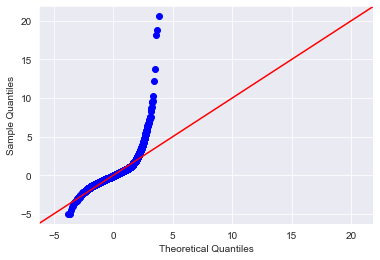

In [15]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Homoscedasticity Assumption

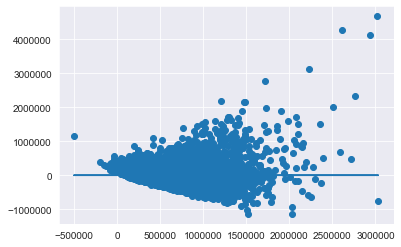

In [17]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [18]:
# I still need to make a few more refinements, especially since I have quite a few outliers to check out

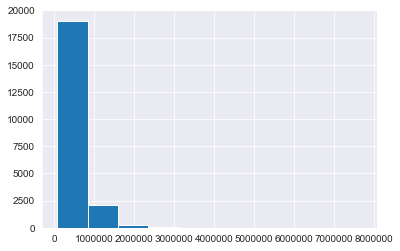

In [19]:
df.price.hist()

In [20]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.8 percentile: 700435.9999999998
0.81 percentile: 718000.0
0.82 percentile: 730000.72
0.83 percentile: 749950.0
0.84 percentile: 760003.2
0.85 percentile: 779721.9999999991
0.86 percentile: 799000.0
0.87 percentile: 815000.0
0.88 percentile: 836739.9999999998
0.89 percentile: 859967.6
0.9 percentile: 887000.0
0.91 percentile: 919993.6
0.92 percentile: 950000.0
0.93 percentile: 997964.0000000002
0.94 percentile: 1060000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1390000.0
0.98 percentile: 1600000.0
0.99 percentile: 1970000.0


In [21]:
#subsetting extreme outliers
orig_tot = len(df)
df = df[df.price < 1700000] 
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.price.map(np.log) 
# Applying a log transformation


train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

Percent removed: 0.016946798166412


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     2107.
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:01:59   Log-Likelihood:            -2.1456e+05
No. Observations:               15923   AIC:                         4.292e+05
Df Residuals:                   15912   BIC:                         4.292e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.209e+05   1368.317    380.704      0.000    5.18e+05    5.24e+05
bedrooms      -1.077e+04   1732.457     -6.218      0.000   -1.42e+04   -7376.904
bathrooms     -1.405e+04   2328.677     -6.033      0.000   -1.86e+04   -9485.278
sqft_living    1.021e+05   3186.627     32.046      0.000    9.59e+04    1.08e+05
floors         5157.1713   1696.180      3.040      0.002    1832.467    8481.876
waterfront     1.698e+04   1864.584      9.105      0.000    1.33e+04    2.06e+04
view           3.944e+04   1600.769     24.640      0.000    3.63e+04    4.26e+04
condition      3.336e+04   1436.467     23.225      0.000    3.05e+04    3.62e+04
grade           1.04e+05   2445.829     42.516      0.000    9.92e+04    1.09e+05
sqft_living15  2.558e+04   2322.438     11.016      0.000     2.1e+04    3.01e+04
sqft_lot15    -1.268e+04   1468.923     -8.635      0.000   -1.56e+04   -9804.764
==============================================================================
Omnibus:                     2373.448   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5435.381
Skew:                           0.871   Prob(JB):                         0.00
Kurtosis:                       5.271   Cond. No.                         4.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

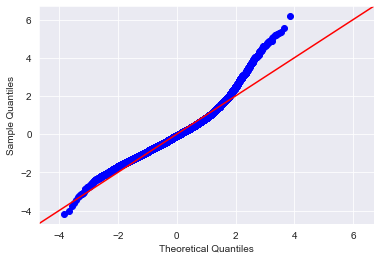

In [22]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
# Definitely much smoother than what I had previously
# Still needs work but getting closer

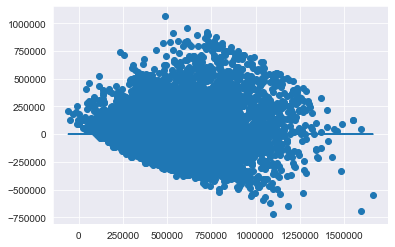

In [23]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

0.8 percentile: 685000.0
0.81 percentile: 700000.0
0.82 percentile: 712000.0
0.83 percentile: 725000.0
0.84 percentile: 740000.0
0.85 percentile: 754000.0
0.86 percentile: 771000.0
0.87 percentile: 788049.9999999993
0.88 percentile: 805000.0
0.89 percentile: 825000.0
0.9 percentile: 850000.0
0.91 percentile: 870000.0
0.92 percentile: 900000.0
0.93 percentile: 930000.0
0.94 percentile: 970000.0
0.95 percentile: 1020000.0
0.96 percentile: 1100000.0
0.97 percentile: 1200000.0
0.98 percentile: 1300000.0
0.99 percentile: 1450000.0


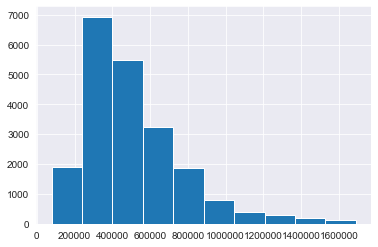

In [25]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

df.price.hist()

In [26]:
df = df[df.list_price <= 1400000]
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     2092.
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:04:45   Log-Likelihood:            -2.1471e+05
No. Observations:               15923   AIC:                         4.294e+05
Df Residuals:                   15912   BIC:                         4.295e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.206e+05   1380.142    377.188      0.000    5.18e+05    5.23e+05
bedrooms      -1.172e+04   1757.853     -6.669      0.000   -1.52e+04   -8278.094
bathrooms     -1.231e+04   2346.447     -5.248      0.000   -1.69e+04   -7713.941
sqft_living     1.04e+05   3230.413     32.194      0.000    9.77e+04     1.1e+05
floors         4079.6937   1697.336      2.404      0.016     752.723    7406.664
waterfront      1.59e+04   1858.137      8.559      0.000    1.23e+04    1.95e+04
view           3.812e+04   1620.184     23.526      0.000    3.49e+04    4.13e+04
condition      3.354e+04   1441.333     23.269      0.000    3.07e+04    3.64e+04
grade          1.069e+05   2468.090     43.299      0.000    1.02e+05    1.12e+05
sqft_living15  2.179e+04   2347.940      9.280      0.000    1.72e+04    2.64e+04
sqft_lot15    -1.147e+04   1404.517     -8.169      0.000   -1.42e+04   -8720.299
==============================================================================
Omnibus:                     2506.141   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5914.749
Skew:                           0.904   Prob(JB):                         0.00
Kurtosis:                       5.377   Cond. No.                         5.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

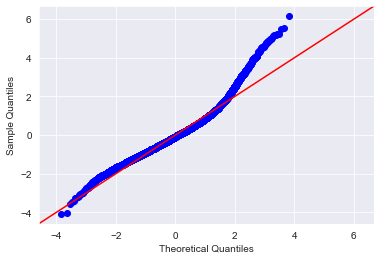

In [27]:

fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

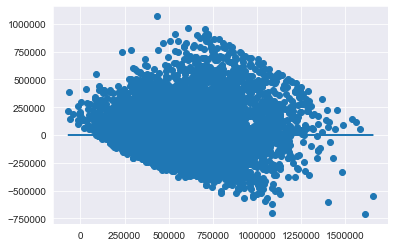

In [28]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

King County DataSet - Regression Analysis and Diagnostics for Price~price
-------------------------------------------------------------------------------------


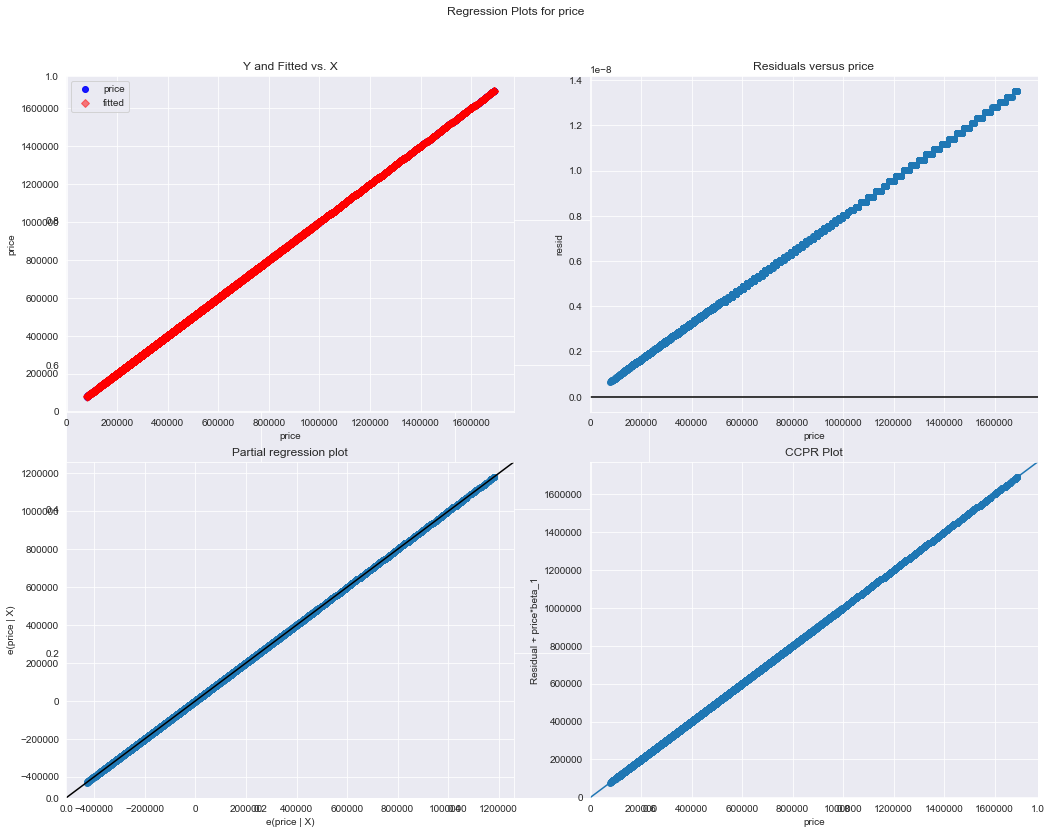

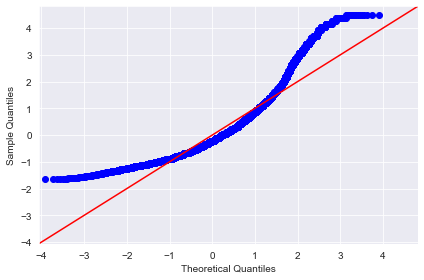

Press Enter to continue...
King County DataSet - Regression Analysis and Diagnostics for Price~bedrooms
-------------------------------------------------------------------------------------


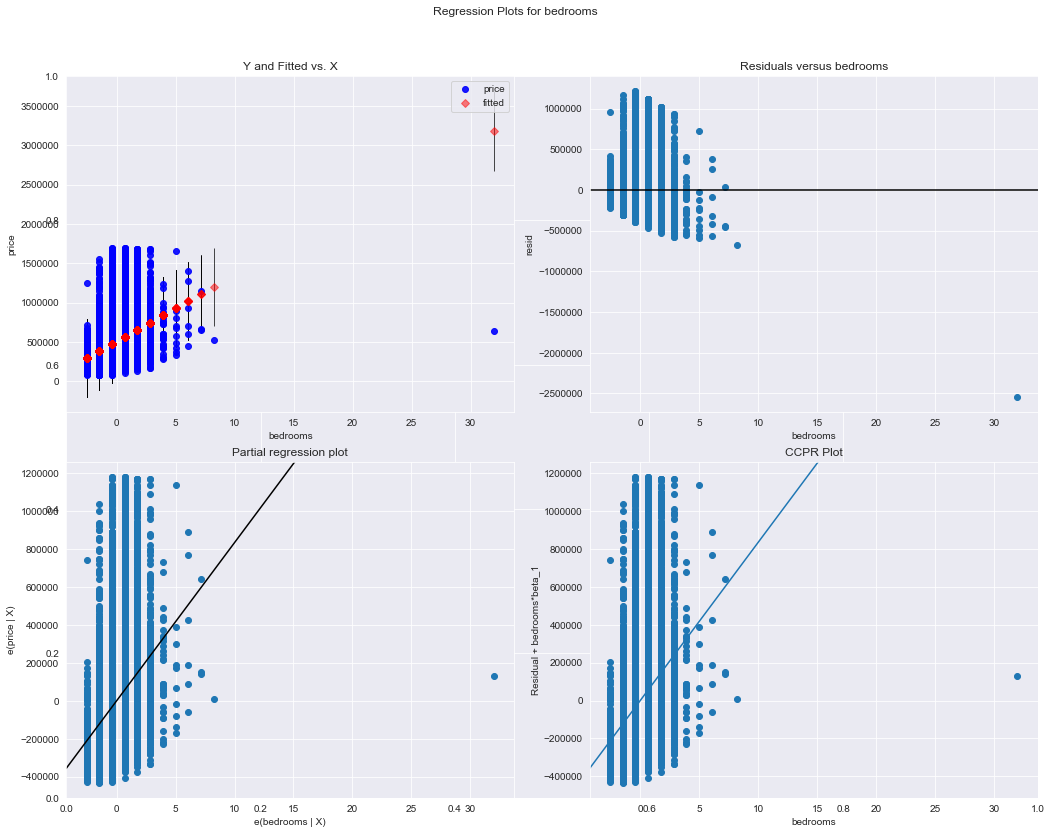

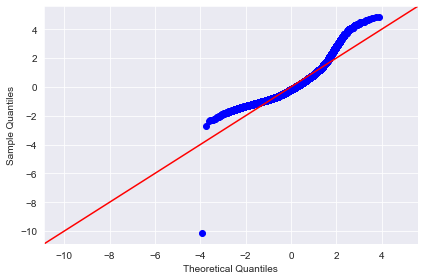

Press Enter to continue...
King County DataSet - Regression Analysis and Diagnostics for Price~bathrooms
-------------------------------------------------------------------------------------


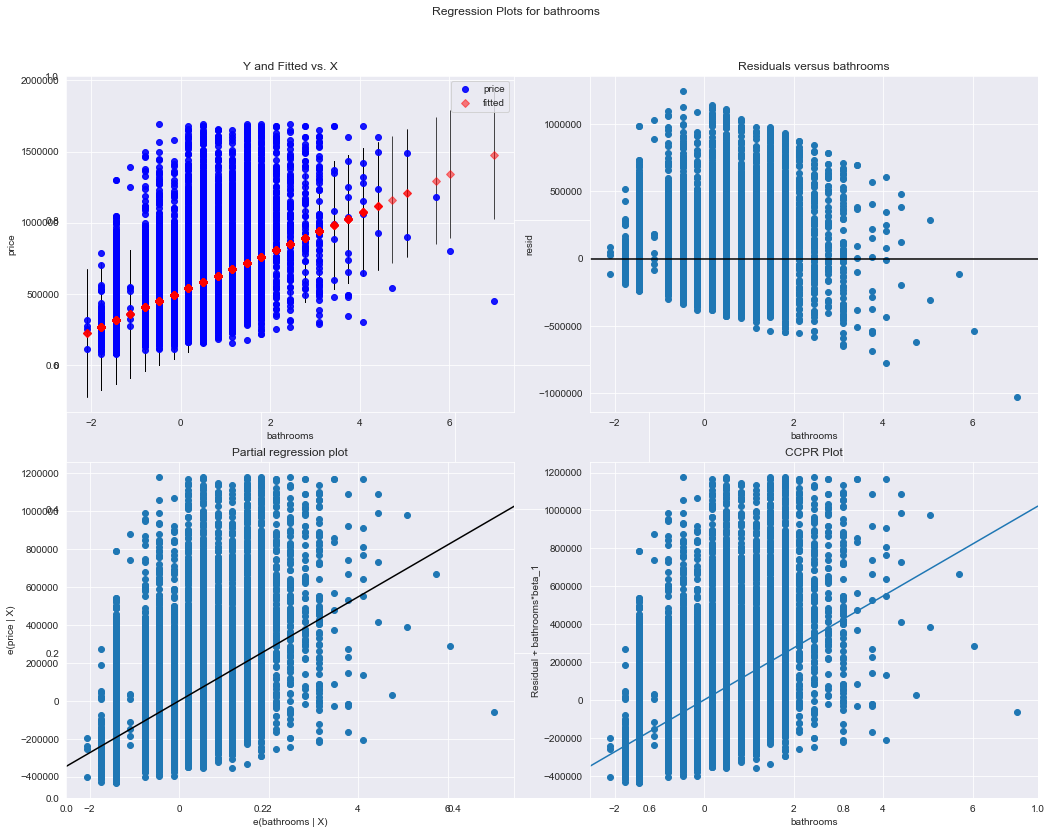

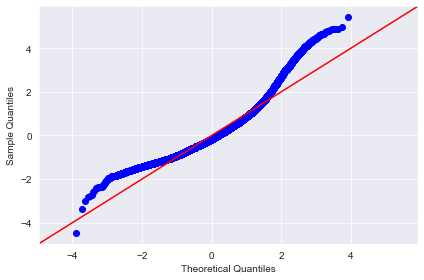

Press Enter to continue...
King County DataSet - Regression Analysis and Diagnostics for Price~sqft_living
-------------------------------------------------------------------------------------


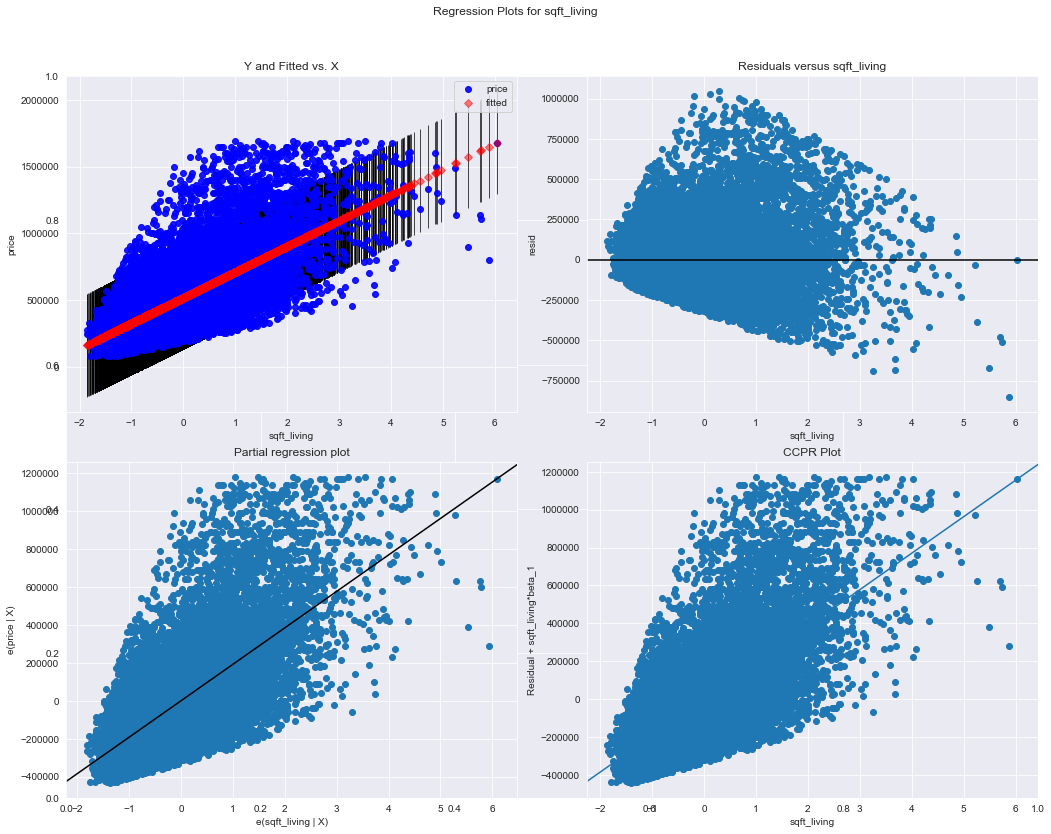

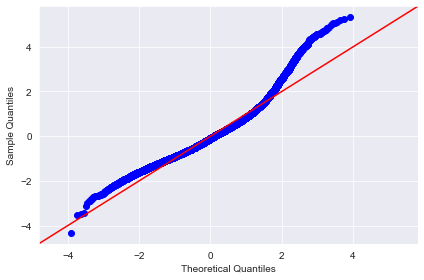

Press Enter to continue...
King County DataSet - Regression Analysis and Diagnostics for Price~sqft_lot
-------------------------------------------------------------------------------------


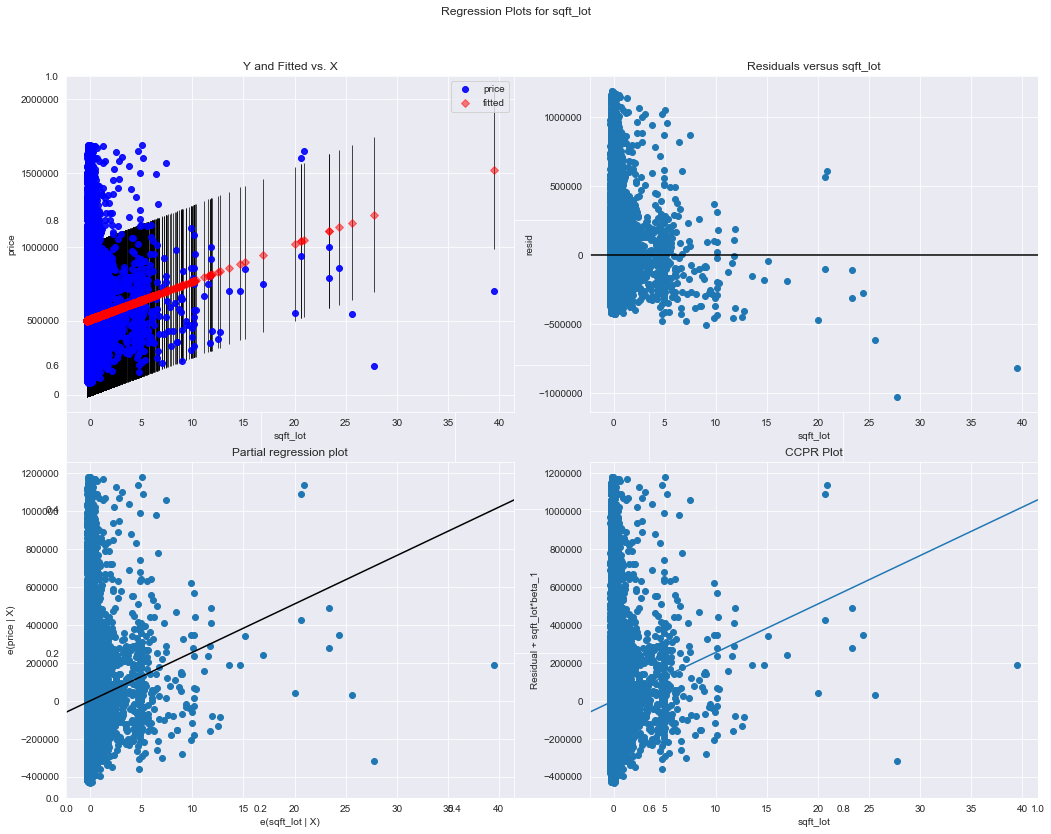

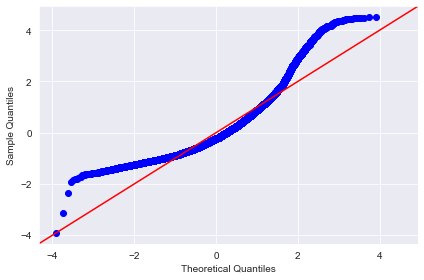

Press Enter to continue...
King County DataSet - Regression Analysis and Diagnostics for Price~floors
-------------------------------------------------------------------------------------


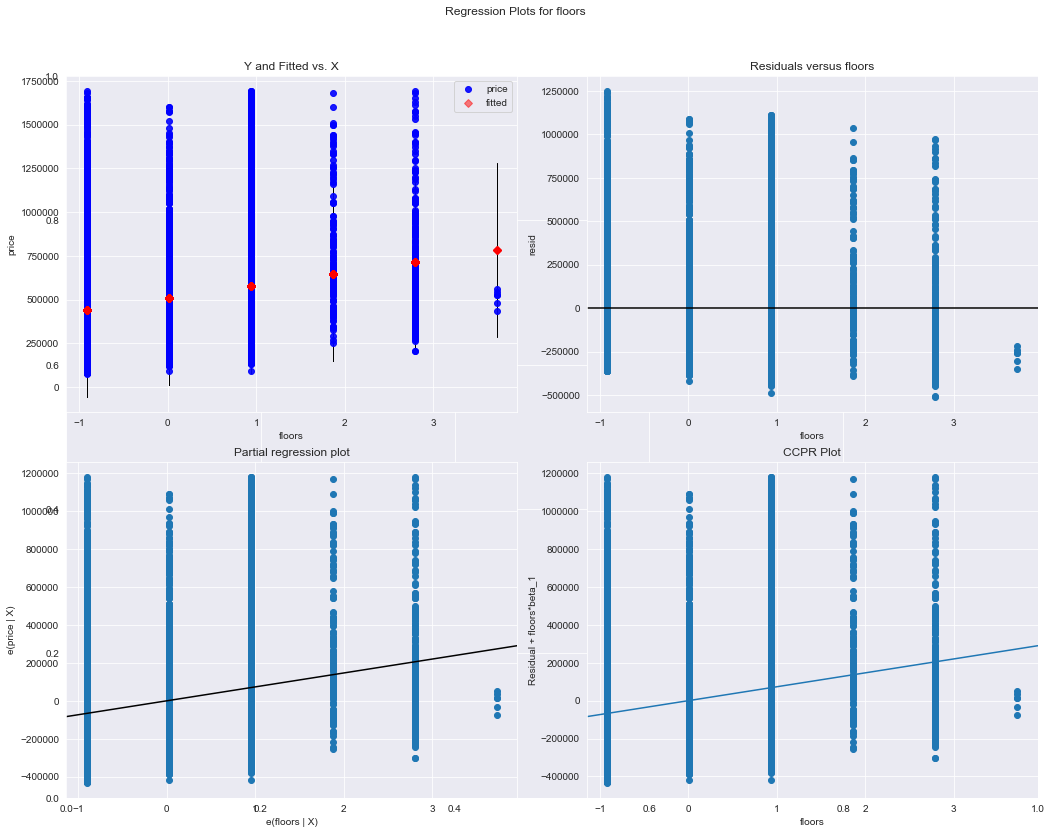

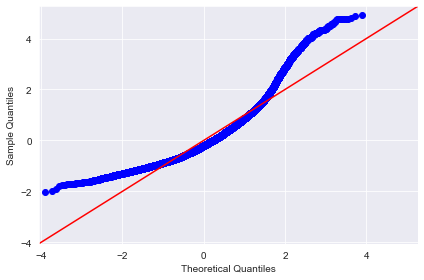

Press Enter to continue...
King County DataSet - Regression Analysis and Diagnostics for Price~waterfront
-------------------------------------------------------------------------------------


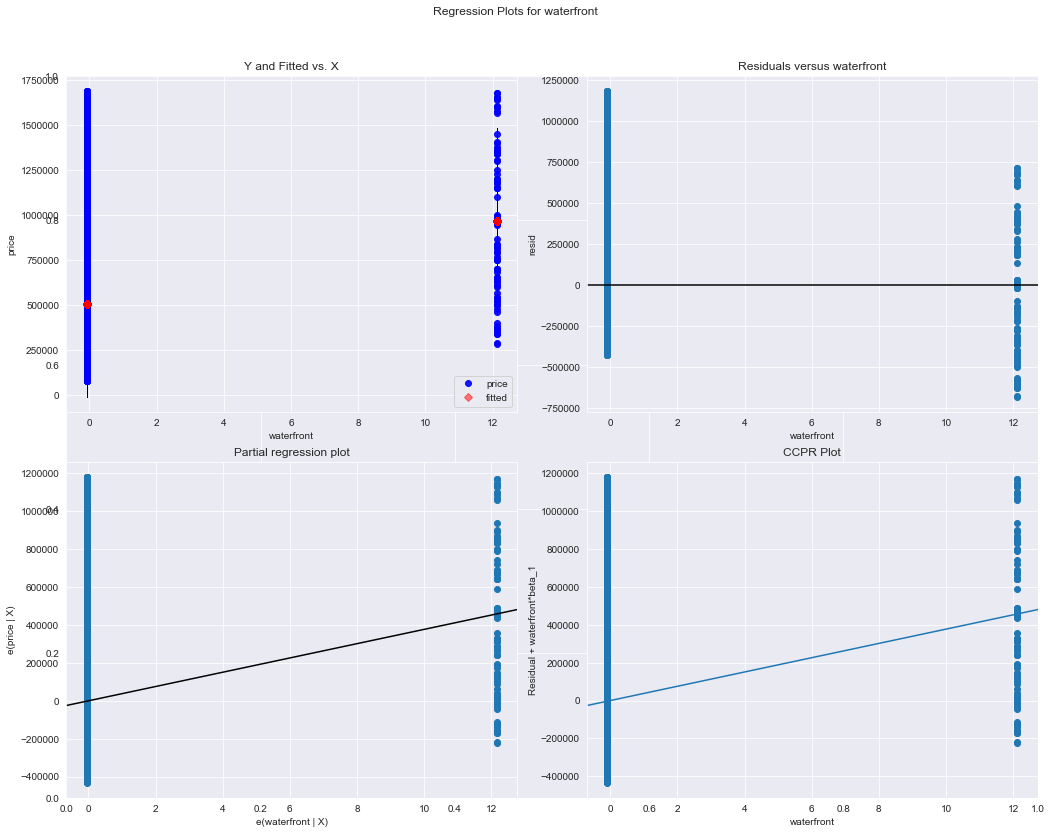

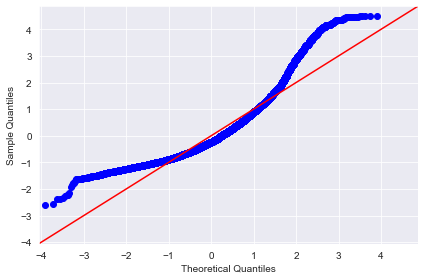

In [ ]:
results = []
for idx, column in enumerate(df.columns):
    print (f"King County DataSet - Regression Analysis and Diagnostics for Price~{column}")
    print ("-------------------------------------------------------------------------------------")

    f = f'price~{column}'
    model = smf.ols(formula=f, data=df).fit()
    
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()
    
    results.append([column, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])
    input("Press Enter to continue...")

In [ ]:
pd.DataFrame(results, columns=['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ])